In [1]:
import csv
import pandas as pd
import numpy as np
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
encodings = ['utf-8', 'ISO-8859-1', 'latin1', 'cp1252']
for encoding in encodings:
    try:
        df = pd.read_csv("dataset_uncleaned.csv", encoding=encoding)
        print(f"Successfully read with encoding: {encoding}")
        break
    except UnicodeDecodeError:
        print(f"Failed with encoding: {encoding}")

Failed with encoding: utf-8
Successfully read with encoding: ISO-8859-1


In [5]:
df = pd.read_csv('dataset_uncleaned.csv',encoding='ISO-8859-1')

In [6]:
df.head()

,Disease,Count of Disease Occurrence,Symptom
0,UMLS:C0020538_hypertensive disease,3363.0,UMLS:C0008031_pain chest
1,NaN,NaN,UMLS:C0392680_shortness of breath
2,NaN,NaN,UMLS:C0012833_dizziness
3,NaN,NaN,UMLS:C0004093_asthenia
4,NaN,NaN,UMLS:C0085639_fall


In [7]:
data = df.fillna(method='ffill')

In [8]:
data.head()

,Disease,Count of Disease Occurrence,Symptom
0,UMLS:C0020538_hypertensive disease,3363.0,UMLS:C0008031_pain chest
1,UMLS:C0020538_hypertensive disease,3363.0,UMLS:C0392680_shortness of breath
2,UMLS:C0020538_hypertensive disease,3363.0,UMLS:C0012833_dizziness
3,UMLS:C0020538_hypertensive disease,3363.0,UMLS:C0004093_asthenia
4,UMLS:C0020538_hypertensive disease,3363.0,UMLS:C0085639_fall


In [13]:
def process_data(data):
   data_list = []
   data_name = data.replace('^','_').split('_')
   n = 1
   for names in data_name:
    if (n % 2 == 0):
      data_list.append(names)
      n += 1
    return data_list

In [14]:
disease_list = []
disease_symptom_dict = defaultdict(list)
disease_symptom_count = {}
count = 0

In [16]:
for idx, row in data.iterrows():

      # Get the Disease Names
    if (row['Disease'] !="\xc2\xa0") and (row['Disease'] != ""):
       disease = row['Disease']
       disease_list = process_data(data=disease)
       count = row['Count of Disease Occurrence']

In [23]:
# Get the Symptoms Corresponding to Diseases
if(row['Symptom'] !="\xc2\xa0") and (row['Symptom'] != ""):
    symptom = row['Symptom']
    symptom_list = process_data(data=symptom)
    for d in disease_list:
        for s in symptom_list:
                disease_symptom_dict[d].append(s)
        disease_symptom_count[d] = count


In [24]:
disease_symptom_dict

defaultdict(list, {})

In [25]:
disease_symptom_count

{}

In [28]:
f = open('dataset_clean.csv', 'w')
with f:
    writer = csv.writer(f)
    for key, val in disease_symptom_dict.items():
            for i in range(len(val)):
                writer.writerow([key, val[i], disease_symptom_count[key]])

In [36]:
df = pd.read_csv('dataset_clean.csv',encoding='ISO-8859-1')
df.columns = ['Source','Target','Weight']
df.head()

,Source,Target,Weight
0,depression mental,feeling suicidal,1337
1,depression mental,suicidal,1337
2,depression mental,hallucinations auditory,1337
3,depression mental,feeling hopeless,1337
4,depression mental,weepiness,1337


In [37]:
# Remove any rows with empty values
df.replace(float('nan'), np.nan, inplace=True)
df.dropna(inplace=True)

In [41]:
from sklearn import preprocessing
n_unique = len(df['symptom'].unique())
n_unique
df.dtypes
# Encode the Labels
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df['symptom'])
print(integer_encoded)

[120 353 147 ... 384 304  24]


In [42]:
# One Hot Encode the Labels
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
onehot_encoded[0]
len(onehot_encoded[0])
cols = np.asarray(df['symptom'].unique())
cols

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


array(['feeling suicidal', 'suicidal', 'hallucinations auditory',
       'feeling hopeless', 'weepiness', 'sleeplessness',
       'motor retardation', 'irritable mood', 'blackout',
       'mood depressed', 'hallucinations visual', 'worry', 'agitation',
       'tremor', 'intoxication', 'verbal auditory hallucinations',
       'energy increased', 'difficulty', 'nightmare',
       'unable to concentrate', 'homelessness', 'thicken',
       'tumor cell invasion', 'metastatic lesion', 'pain neck',
       'lung nodule', 'pain', 'pain abdominal', 'food intolerance',
       'mass of body structure', 'atypia', 'shortness of breath',
       'prostatism', 'drowsiness', 'sleepy', 'hyponatremia', 'fall',
       'unsteady gait', 'polyuria', 'hypotension', 'syncope',
       'speech slurred', 'weight gain', 'asthenia', 'fatigue', 'tired',
       'mental status changes', 'vomiting', 'numbness', 'hematuria',
       'dysesthesia', 'polymyalgia', 'passed stones', 'pleuritic pain',
       'guaiac positive',

In [43]:
# Create a new dataframe to save OHE labels
df_ohe = pd.DataFrame(columns = cols)
df_ohe.head()
for i in range(len(onehot_encoded)):
    df_ohe.loc[i] = onehot_encoded[i]
df_ohe.head()
len(df_ohe)

2129

In [44]:
# Disease Dataframe
df_disease = df['disease']
df_disease.head()

0    depression mental
1    depression mental
2    depression mental
3    depression mental
4    depression mental
Name: disease, dtype: object

In [45]:
# Concatenate OHE Labels with the Disease Column
df_concat = pd.concat([df_disease,df_ohe], axis=1)
df_concat.head()
df_concat.drop_duplicates(keep='first',inplace=True)
df_concat.head()
len(df_concat)
cols = df_concat.columns
cols
cols = cols[1:]

In [46]:
# Since, every disease has multiple symptoms, combine all symptoms per disease per
row
df_concat = df_concat.groupby('disease').sum()
df_concat = df_concat.reset_index()
df_concat[:5]
len(df_concat)
df_concat.to_csv("training_data.csv", index=False)

In [47]:
# One Hot Encoded Features
X = df_concat[cols]
# Labels
y = df_concat['disease']

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [49]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=101)

In [50]:
len(X_train), len(y_train)
len(X_test), len(y_test)
dt = DecisionTreeClassifier()
clf_dt=dt.fit(X, y)
clf_dt.score(X, y)
export_graphviz(dt,
 out_file='./tree.dot',feature_names=cols)

C:\Users\sreejith\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\sreejith\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [51]:
!pip install graphviz


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


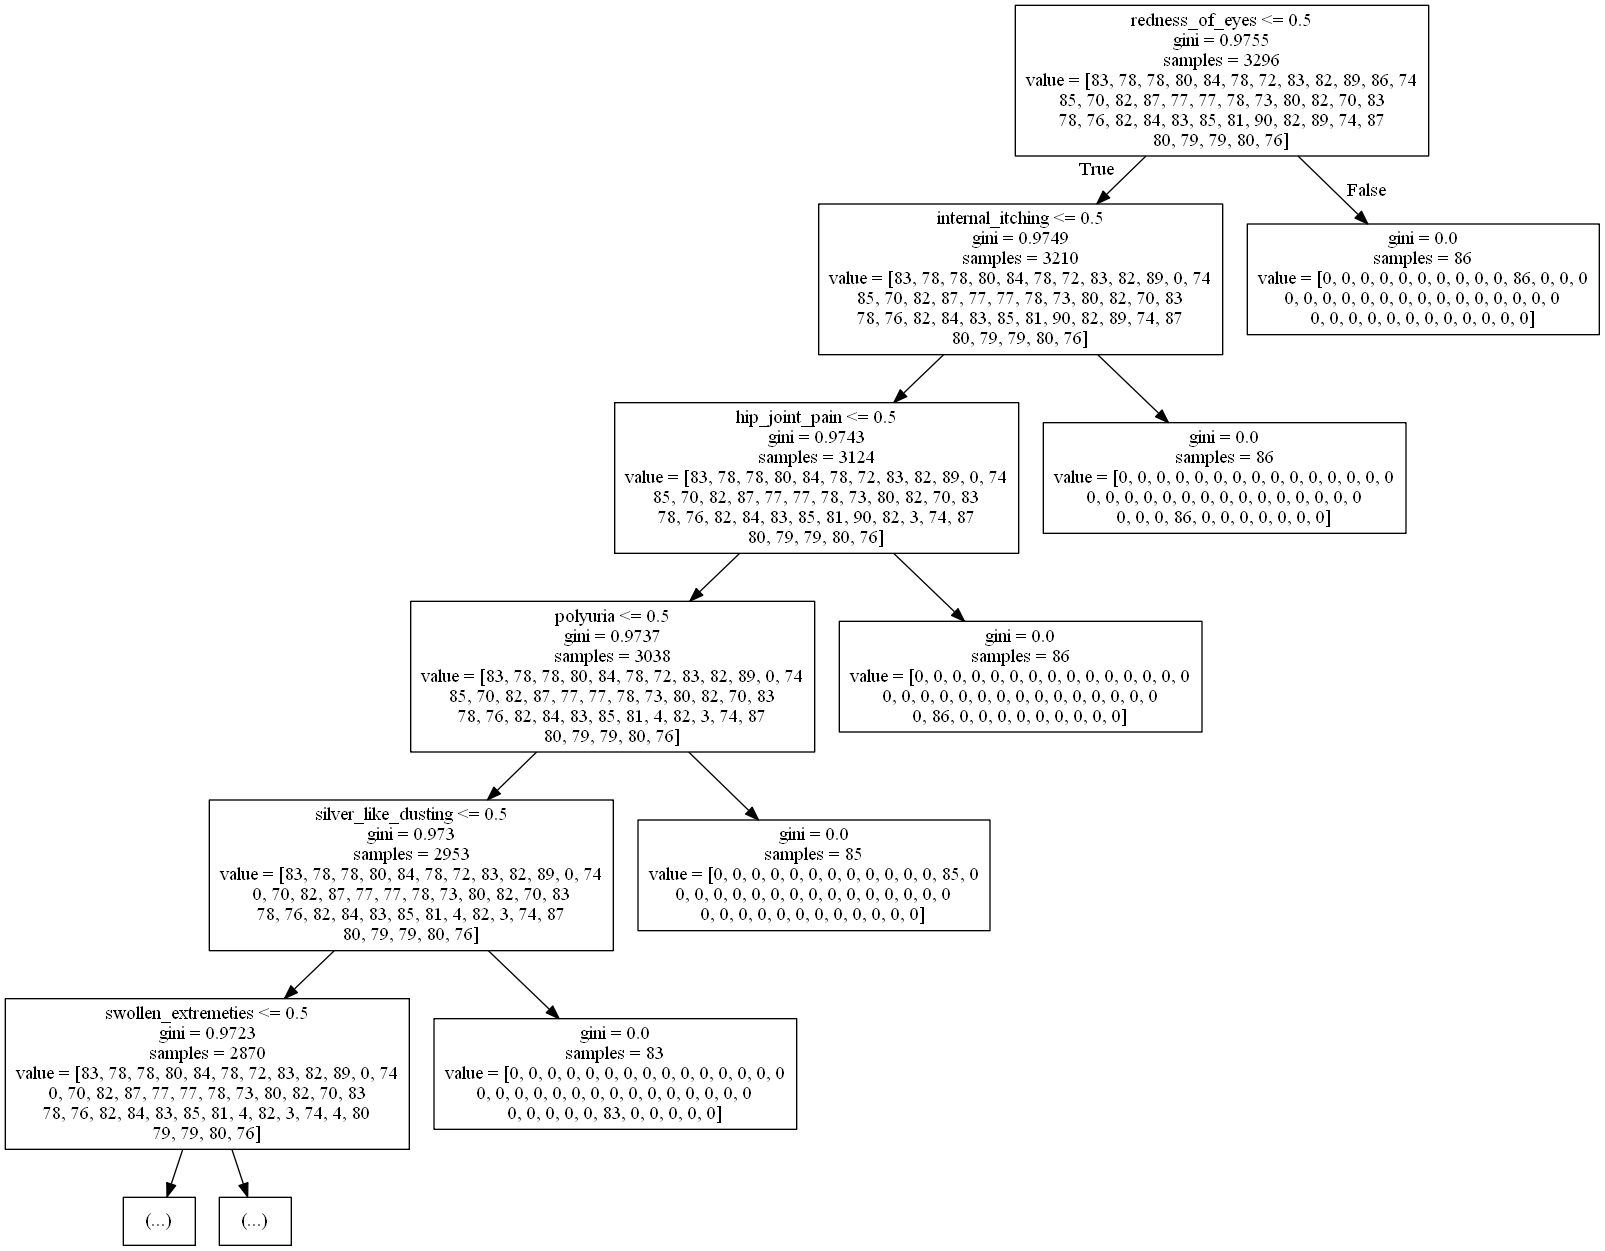

In [68]:
from IPython.display import Image
Image(filename='tree-top5.png')

In [69]:
disease_pred = clf_dt.predict(X)
disease_real = y.values
for i in range(0, len(disease_real)):
    if disease_pred[i]!=disease_real[i]:
        print ('Pred: {0}\nActual: {1}\n'.format(disease_pred[i], disease_real[i]))

Pred: HIV
Actual: acquired immuno-deficiency syndrome

Pred: biliary calculus
Actual: cholelithiasis

Pred: coronary arteriosclerosis
Actual: coronary heart disease

Pred: depression mental
Actual: depressive disorder

Pred: HIV
Actual: hiv infections

Pred: carcinoma breast
Actual: malignant neoplasm of breast

Pred: carcinoma of lung
Actual: malignant neoplasm of lung

Pred: carcinoma prostate
Actual: malignant neoplasm of prostate

Pred: carcinoma colon
Actual: malignant tumor of colon

Pred: candidiasis
Actual: oralcandidiasis

Pred: effusion pericardial
Actual: pericardial effusion body substance

Pred: malignant neoplasms
Actual: primary malignant neoplasm

Pred: sepsis (invertebrate)
Actual: septicemia

Pred: sepsis (invertebrate)
Actual: systemic infection

Pred: tonic-clonic epilepsy
Actual: tonic-clonic seizures



C:\Users\sreejith\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
